# Text Emotion Classification (CPU-Friendly)

**Author:** Syeda Hafsa Salman

**Dataset:** Text Emotion Dataset (106k samples, 11 emotions)  

**Environment:** CPU-Friendly (No GPU required)  

This notebook demonstrates an **end-to-end NLP workflow** on the Text Emotion Dataset.  
It is designed to be **educational, high-quality, and fast-executing**, covering:

- Dataset understanding & basic cleaning checks  
- Exploratory Data Analysis (EDA) with visualizations  
- Classical ML baseline (**TF-IDF + Logistic Regression**) optimized for CPU   
- Model evaluation, performance metrics, and insights  

> 💡 Optimized for environments **without GPU**, achieving strong performance in minimal time.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/text-emotion/final_dataset.csv


# Import Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv("/kaggle/input/text-emotion/final_dataset.csv")
df.head()


,text,emotion
0,i feel rather funny ending with so many dupes ...,fun
1,i feel surprised by the result,surprise
2,i am officially feeling festive,neutral
3,i suddenly found myself standing before this w...,surprise
4,i look at the meager pile of food i purchased ...,enthusiasm


# Dataset Info

In [4]:
print("Dataset Shape:", df.shape)
df.info()


Dataset Shape: (106355, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106355 entries, 0 to 106354
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   text     106355 non-null  object
 1   emotion  106355 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


## 🧹 Data Quality Checks


## Missing Values

In [5]:
df.isnull().sum()


text       0
emotion    0
dtype: int64

## Duplicates

In [6]:
df.duplicated().sum()


np.int64(25529)


## 🎯 Emotion Class Distribution
The dataset is balanced, which is ideal for deep learning models.


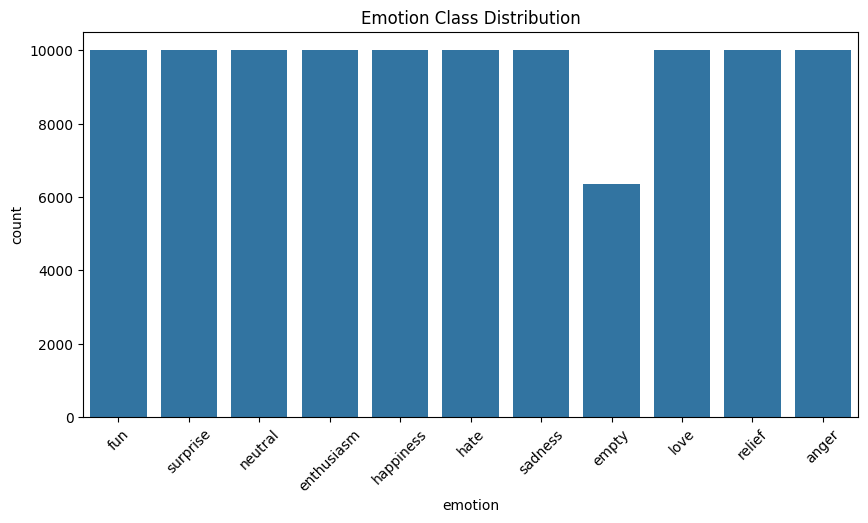

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(x="emotion", data=df)
plt.xticks(rotation=45)
plt.title("Emotion Class Distribution")
plt.show()


## 📝 Sentence Length Analysis


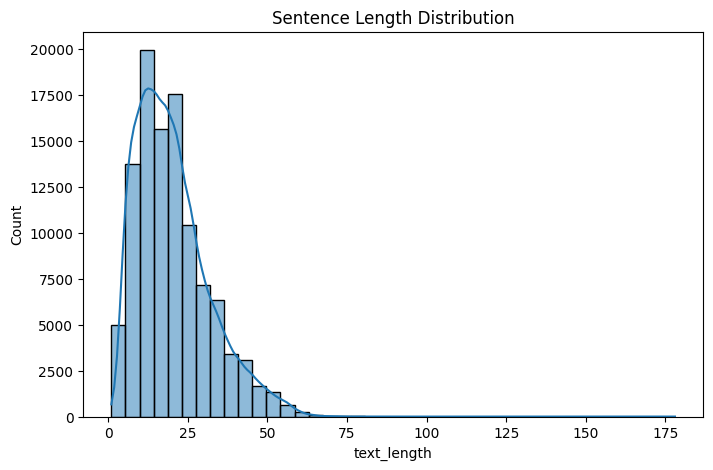

In [8]:
df["text_length"] = df["text"].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(df["text_length"], bins=40, kde=True)
plt.title("Sentence Length Distribution")
plt.show()


## 🔠 Label Encoding


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["label"] = le.fit_transform(df["emotion"])

label2id = dict(zip(le.classes_, le.transform(le.classes_)))
id2label = dict(zip(le.transform(le.classes_), le.classes_))

label2id


{'anger': np.int64(0),
 'empty': np.int64(1),
 'enthusiasm': np.int64(2),
 'fun': np.int64(3),
 'happiness': np.int64(4),
 'hate': np.int64(5),
 'love': np.int64(6),
 'neutral': np.int64(7),
 'relief': np.int64(8),
 'sadness': np.int64(9),
 'surprise': np.int64(10)}

##  Train–Test Split


In [10]:
X = df['text']
y = df['emotion']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


## TF-IDF Vectorization


In [11]:
tfidf = TfidfVectorizer(
    max_features=30000,
    ngram_range=(1,2),
    stop_words="english",
    sublinear_tf=True
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


##  Train Logistic Regression Model


In [12]:
model = LogisticRegression(
    max_iter=1000,
    n_jobs=-1,
    solver="lbfgs"
)

model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000, n_jobs=-1)

## Model Evaluation


In [13]:
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.8193314841803394

Classification Report:

              precision    recall  f1-score   support

       anger       0.89      0.85      0.87      2000
       empty       0.86      0.60      0.71      1271
  enthusiasm       0.98      0.91      0.95      2000
         fun       0.92      0.84      0.88      2000
   happiness       0.73      0.77      0.75      2000
        hate       0.95      0.80      0.87      2000
        love       0.91      0.90      0.90      2000
     neutral       0.69      0.92      0.79      2000
      relief       0.95      0.85      0.90      2000
     sadness       0.63      0.74      0.68      2000
    surprise       0.70      0.75      0.72      2000

    accuracy                           0.82     21271
   macro avg       0.83      0.81      0.82     21271
weighted avg       0.83      0.82      0.82     21271



## Confusion Matrix


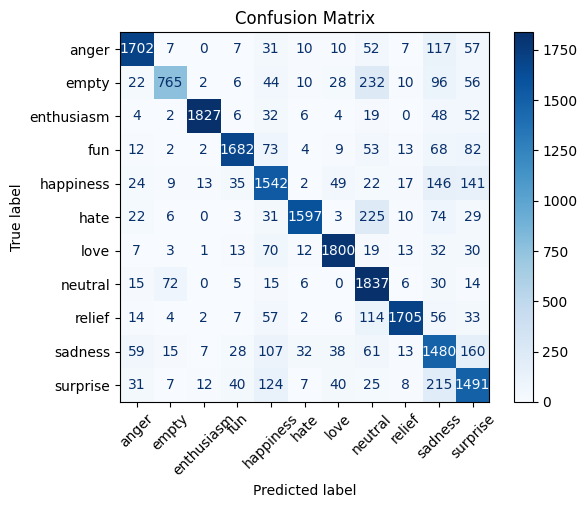

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    xticks_rotation=45,
    cmap="Blues"
)
plt.title("Confusion Matrix")
plt.show()


## Predict on Custom Text


In [15]:
def predict_emotion(text):
    text_tfidf = tfidf.transform([text])
    prediction = model.predict(text_tfidf)
    return prediction[0]

predict_emotion("I feel very happy and excited today!")


'enthusiasm'

## Save Model


In [16]:
import joblib

joblib.dump(model, "emotion_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

## Conclusion

This notebook presents a **CPU-efficient text emotion classification system**
using **TF-IDF feature extraction** and **Logistic Regression**.

Due to the absence of GPU acceleration, a classical machine learning approach
was selected to achieve **strong performance with minimal computational cost**.

This approach is suitable for:
- Large text datasets
- Real-time systems
- Environments without GPU support
